## Pandas time series
A series or dataframe using a datetime index instead of range index.

Used for storing events/data that fits on a timeline.
- Weather data
- Temperature readings.
- Heart rate monitoring.
- Quarterly sales.
- Stock prices.

In [2]:
import pandas as pd
import numpy as np

### Creating a datetimeindex
Use date_range() with 3 of the 4 parameters:
- start
- end
- periods
- freq

In [18]:
datetimeindex = pd.date_range(start='2018-01-01', end='2019-12-31', freq="D")
datetimeindex

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=730, freq='D')

In [19]:
df = pd.DataFrame(
    dict(
        n = range(len(datetimeindex)),
        rand = np.random.random(len(datetimeindex))
    ),
    index=datetimeindex
)
df

,n,rand
2018-01-01,0,0.349941
2018-01-02,1,0.752601
2018-01-03,2,0.735646
2018-01-04,3,0.028047
2018-01-05,4,0.386069
...,...,...
2019-12-27,725,0.768841
2019-12-28,726,0.734656
2019-12-29,727,0.794449
2019-12-30,728,0.183788


In [29]:
df.loc["2018-03-15"]
df.loc[:"2018-03-15"]
df.loc["2018-03-15":"2018-03-20"]
df.loc["2018-03"]
df.loc["2019"]
df.loc["2019-03-29":"2019-05"]

,n,rand
2019-03-29,452,0.304205
2019-03-30,453,0.653219
2019-03-31,454,0.296807
2019-04-01,455,0.999303
2019-04-02,456,0.453254
...,...,...
2019-05-27,511,0.407495
2019-05-28,512,0.847392
2019-05-29,513,0.005262
2019-05-30,514,0.119672


### Resampling
Resampling is the practice of creating new samples with a lower or higher frequency than the original data.

### Downsampling
When the sample frequency is lower than the original we can aggregate values from the original data.

In [36]:
from helpers import hdisplay

resample_method = "Y"

hdisplay([
    df.head(10),
    df.resample(resample_method).agg({"n": "max", "rand": "sum"}).head(10)],
    ["Original", f"Resampled using '{resample_method}'"]
    )

,n,rand
2018-01-01 00:00:00,0,0.349941
2018-01-02 00:00:00,1,0.752601
2018-01-03 00:00:00,2,0.735646
2018-01-04 00:00:00,3,0.028047
2018-01-05 00:00:00,4,0.386069
2018-01-06 00:00:00,5,0.316260
2018-01-07 00:00:00,6,0.632452
2018-01-08 00:00:00,7,0.544475
2018-01-09 00:00:00,8,0.298994
2018-01-10 00:00:00,9,0.673045


### Upsampling
When the sample frequency is higher than the original, we can fill between values:
- ffil
- bfill
- nearest
- interpolation
- fillna

In [48]:
resample_method = "6H"

hdisplay([
    df.head(10),
    df.resample(resample_method).max().fillna(df[["n","rand"]].mean()).head(10)],
    ["Original", f"Resampled using '{resample_method}'"]
    )

,n,rand
2018-01-01 00:00:00,0,0.349941
2018-01-02 00:00:00,1,0.752601
2018-01-03 00:00:00,2,0.735646
2018-01-04 00:00:00,3,0.028047
2018-01-05 00:00:00,4,0.386069
2018-01-06 00:00:00,5,0.316260
2018-01-07 00:00:00,6,0.632452
2018-01-08 00:00:00,7,0.544475
2018-01-09 00:00:00,8,0.298994
2018-01-10 00:00:00,9,0.673045


## Working with real data


In [80]:
apple = pd.read_csv("../Data/HistoricalData_Apple.csv", parse_dates=["Date"], index_col="Date")
apple.rename(columns={"Close/Last": "Close"}, inplace=True)

to_int_columns = ["Close", "Open", "High", "Low"]

apple = apple[to_int_columns].map(lambda value: value.replace("$", "")).astype("float64") #.replace("[\$,]", "", regex=True).astype(float)

#apple = apple.astype({col: "float64" for col in  to_int_columns})

apple.sort_index(inplace=True)

apple

,Close,Open,High,Low
Date,,,,
2013-11-11,18.54,18.57,18.63,18.37
2013-11-12,18.57,18.49,18.71,18.46
2013-11-13,18.59,18.50,18.65,18.46
2013-11-14,18.86,18.67,18.90,18.64
2013-11-15,18.75,18.81,18.90,18.73
...,...,...,...,...
2023-11-03,176.65,174.24,176.82,173.35
2023-11-06,179.23,176.38,179.43,176.21
2023-11-07,181.82,179.18,182.44,178.97


In [77]:
#pd.set_option("display.float_format", '{:.2f}'.format) #decimaler för float
pd.set_eng_float_format(accuracy=2, use_eng_prefix=True)

apple.loc["2018", "Close"].mean()
apple.resample("Y").mean()

,Close,Open,High,Low
Date,,,,
2013-12-31,19.51,19.50,19.65,19.38
2014-12-31,23.07,23.05,23.25,22.87
2015-12-31,30.01,30.04,30.31,29.72
2016-12-31,26.15,26.13,26.36,25.92
2017-12-31,37.64,37.61,37.85,37.37
2018-12-31,47.26,47.28,47.75,46.80
2019-12-31,52.06,51.97,52.46,51.57
2020-12-31,95.35,95.27,96.66,93.91
2021-12-31,140.99,140.86,142.35,139.47


<Axes: xlabel='Date', ylabel='Open'>

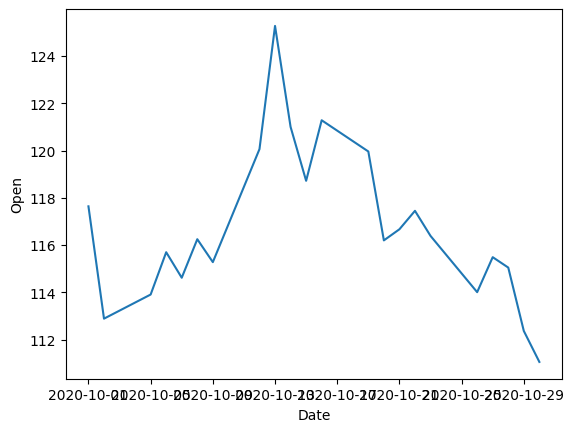

In [92]:
import seaborn as sns
import matplotlib as plt

data = apple.loc["2020-10"]
#data = apple.loc["2020"].resample("M").mean()
#data = apple.resample("QS").mean()
#plt.xticks(rotation=90)
sns.lineplot(data=data, x=data.index, y="Open")